<a href="https://colab.research.google.com/github/thanachin/exxon/blob/main/Inbound_Cleaned(All_dup).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
dr = pd.read_csv('/content/Inbound.csv')
dr.head()

,INBOUND_DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
0,12/15/2023,SINGAPORE-WAREHOUSE,MAT-0354,23.375
1,12/22/2023,SINGAPORE-WAREHOUSE,MAT-0413,1.375
2,12/22/2023,SINGAPORE-WAREHOUSE,MAT-0413,23.375
3,12/22/2023,SINGAPORE-WAREHOUSE,MAT-0413,24.750
4,12/22/2023,SINGAPORE-WAREHOUSE,MAT-0413,19.250


In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19593 entries, 0 to 19592
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INBOUND_DATE     19593 non-null  object 
 1   PLANT_NAME       19593 non-null  object 
 2   MATERIAL_NAME    19593 non-null  object 
 3   NET_QUANTITY_MT  19593 non-null  float64
dtypes: float64(1), object(3)
memory usage: 612.4+ KB


In [ ]:
print(dr.isnull().sum())

INBOUND_DATE       0
PLANT_NAME         0
MATERIAL_NAME      0
NET_QUANTITY_MT    0
dtype: int64


In [ ]:
print(dr.duplicated().sum())

13143


In [ ]:
from datetime import datetime

# Filter records with timestamp newer than 2025
dr['INBOUND_DATE'] = pd.to_datetime(dr['INBOUND_DATE'])
future_records = dr[dr['INBOUND_DATE'] > datetime(2025, 7, 1)]
percent_future_records = (len(future_records) / len(dr)) * 100

# Display the filtered records
print(f"Number of future records: {len(future_records)}")
print(f"Percentage of future records: {percent_future_records:.2f}%")
future_records.head(10)

Number of future records: 0
Percentage of future records: 0.00%


,INBOUND_DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT


<Axes: xlabel='NET_QUANTITY_MT'>

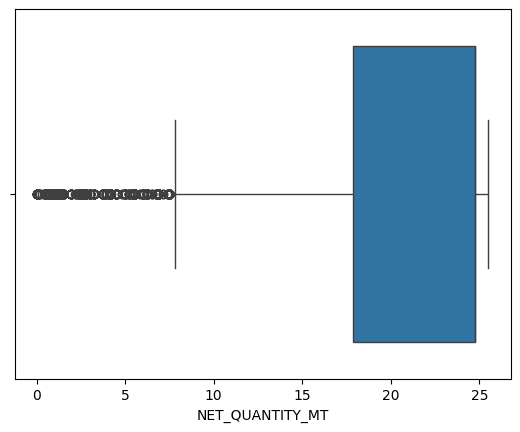

In [ ]:
import seaborn as sns
sns.boxplot(x=dr['NET_QUANTITY_MT'])

In [ ]:
any(dr.duplicated())

True

In [ ]:
dup = dr[(dr.duplicated(keep=False))].value_counts()
dup

INBOUND_DATE  PLANT_NAME           MATERIAL_NAME  NET_QUANTITY_MT
2024-03-27    CHINA-WAREHOUSE      MAT-0332       20.000             117
2024-12-03    CHINA-WAREHOUSE      MAT-0145       25.500              70
2024-01-24    CHINA-WAREHOUSE      MAT-0332       20.000              69
2024-01-07    CHINA-WAREHOUSE      MAT-0001       25.500              62
2024-09-08    SINGAPORE-WAREHOUSE  MAT-0310       24.750              60
                                                                    ... 
2024-08-06    SINGAPORE-WAREHOUSE  MAT-0024       8.250                2
              CHINA-WAREHOUSE      MAT-0281       22.500               2
2024-08-05    CHINA-WAREHOUSE      MAT-0396       24.750               2
                                   MAT-0032       25.500               2
2024-08-04    SINGAPORE-WAREHOUSE  MAT-0335       15.125               2
Name: count, Length: 2623, dtype: int64

In [ ]:
dr.drop_duplicates(inplace=True)

In [ ]:
for i in dr.columns:
    print(i)
    print(dr[i].unique())
    print('-'*50)

INBOUND_DATE
<DatetimeArray>
['2023-12-15 00:00:00', '2023-12-22 00:00:00', '2023-12-23 00:00:00',
 '2024-01-21 00:00:00', '2024-01-27 00:00:00', '2024-02-10 00:00:00',
 '2024-02-13 00:00:00', '2024-03-14 00:00:00', '2024-04-28 00:00:00',
 '2024-05-10 00:00:00',
 ...
 '2024-12-10 00:00:00', '2024-12-14 00:00:00', '2024-11-29 00:00:00',
 '2024-12-18 00:00:00', '2024-11-18 00:00:00', '2024-12-15 00:00:00',
 '2024-12-17 00:00:00', '2024-12-04 00:00:00', '2024-12-22 00:00:00',
 '2024-12-24 00:00:00']
Length: 356, dtype: datetime64[ns]
--------------------------------------------------
PLANT_NAME
['SINGAPORE-WAREHOUSE' 'CHINA-WAREHOUSE']
--------------------------------------------------
MATERIAL_NAME
['MAT-0354' 'MAT-0413' 'MAT-0105' 'MAT-0304' 'MAT-0374' 'MAT-0109'
 'MAT-0056' 'MAT-0237' 'MAT-0263' 'MAT-0175' 'MAT-0011' 'MAT-0367'
 'MAT-0247' 'MAT-0234' 'MAT-0335' 'MAT-0363' 'MAT-0046' 'MAT-0392'
 'MAT-0116' 'MAT-0085' 'MAT-0424' 'MAT-0244' 'MAT-0099' 'MAT-0171'
 'MAT-0068' 'MAT-0309' 'MA

In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 19583
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   INBOUND_DATE     6450 non-null   datetime64[ns]
 1   PLANT_NAME       6450 non-null   object        
 2   MATERIAL_NAME    6450 non-null   object        
 3   NET_QUANTITY_MT  6450 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 252.0+ KB


<Axes: xlabel='NET_QUANTITY_MT'>

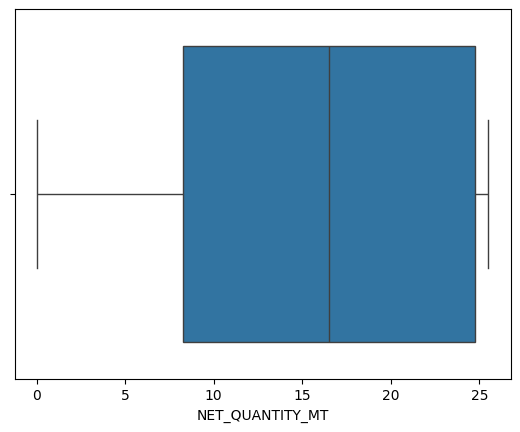

In [ ]:
import seaborn as sns
sns.boxplot(x=dr['NET_QUANTITY_MT'])

In [ ]:
sd = dr['NET_QUANTITY_MT'].std()
mean = dr['NET_QUANTITY_MT'].mean()
print(mean)
print(sd)

15.615203565891472
8.213189853076395


In [ ]:
cv = (sd/mean)*100
print(cv)

52.59739214041751


In [ ]:
df = dr.groupby(['INBOUND_DATE','PLANT_NAME','MATERIAL_NAME']).sum()

In [ ]:
df

NET_QUANTITY_MT
INBOUND_DATE PLANT_NAME          MATERIAL_NAME                 
2023-11-03   CHINA-WAREHOUSE     MAT-0237                74.250
2023-11-07   SINGAPORE-WAREHOUSE MAT-0085                23.375
                                 MAT-0116                23.375
                                 MAT-0309                24.750
2023-11-09   CHINA-WAREHOUSE     MAT-0009                41.600
...                                                         ...
2024-12-22   CHINA-WAREHOUSE     MAT-0339                25.500
2024-12-24   CHINA-WAREHOUSE     MAT-0042                24.750
                                 MAT-0118                24.750
                                 MAT-0232                24.750
                                 MAT-0265                24.750

[2121 rows x 1 columns]

In [ ]:
df.to_csv('Inbound_Cleaned(All dup).csv', index =  False)
from google.colab import files
files.download('Inbound_Cleaned(All dup).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>